# Importing required libraries

In [ ]:
# pip install -r requirements.txt
!pip install yfinance


In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Fetching Data from yahoo finance

In [ ]:
START = "2012-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('WIPRO.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
0,2012-01-02,67.722862,68.215088,67.111833,67.722862,3416916
1,2012-01-03,70.693161,70.930789,68.121732,68.291464,11529794
2,2012-01-04,70.990189,72.135876,70.497970,71.066573,10151554
3,2012-01-05,70.430092,71.779456,69.793599,70.557390,6062915
4,2012-01-06,68.868553,70.090625,68.418768,70.090625,6655273


In [ ]:
df = df.drop(['Date','Open','High','Low', 'Volume'], axis = 1)

<ipython-input-51-b762d74b983a>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date','Open','High','Low', 'Volume'], axis = 1)


In [ ]:
df.head()

Price,Close
Ticker,WIPRO.NS
0,67.722862
1,70.693161
2,70.990189
3,70.430092
4,68.868553


# Plotting Closing Price

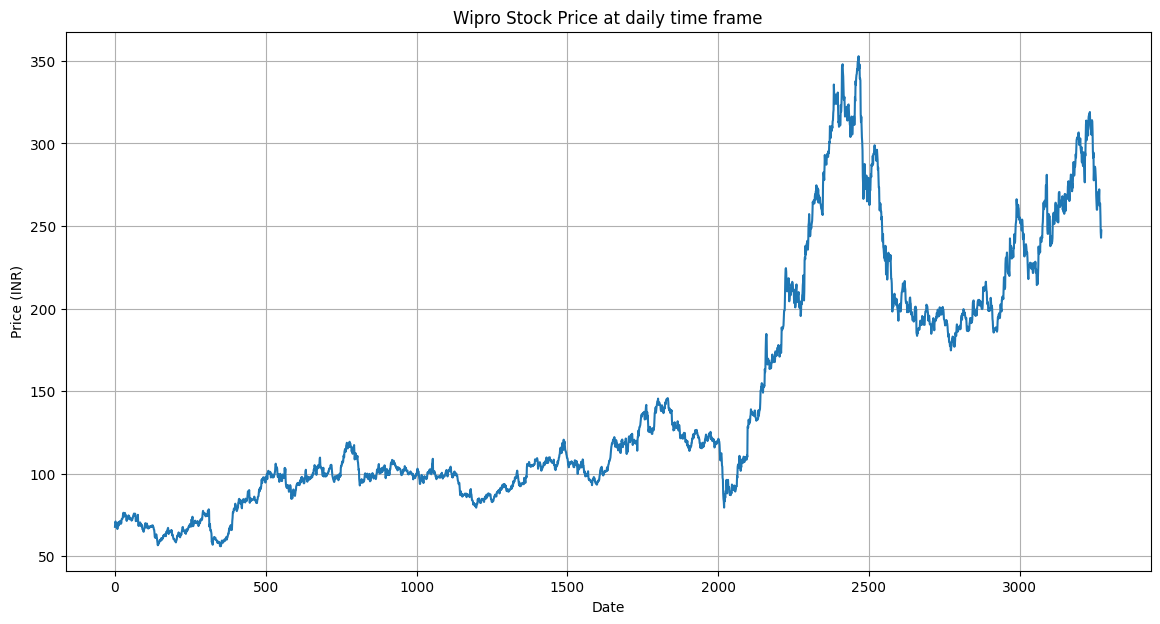

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title("Wipro Stock Price at daily time frame")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close
Ticker,WIPRO.NS
0,67.722862
1,70.693161
2,70.990189
3,70.430092
4,68.868553
...,...
3267,263.600006
3268,256.350006
3269,246.300003


In [ ]:
df.shape

(3272, 1)

# Dataset Spliting for training (70%) and testing (30%)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
0,2012-01-02,67.722862,68.215088,67.111833,67.722862,3416916
1,2012-01-03,70.693161,70.930789,68.121732,68.291464,11529794
2,2012-01-04,70.990189,72.135876,70.497970,71.066573,10151554
3,2012-01-05,70.430092,71.779456,69.793599,70.557390,6062915
4,2012-01-06,68.868553,70.090625,68.418768,70.090625,6655273
...,...,...,...,...,...,...
3267,2025-04-02,263.600006,265.549988,261.100006,262.799988,7136992
3268,2025-04-03,256.350006,260.500000,255.300003,259.899994,12262561
3269,2025-04-04,246.300003,253.949997,244.850006,253.000000,14639785


In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])
print(data.shape)
print(train.shape)
print(test.shape)

(3272, 6)
(2290, 6)
(982, 6)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
0,2012-01-02,67.722862,68.215088,67.111833,67.722862,3416916
1,2012-01-03,70.693161,70.930789,68.121732,68.291464,11529794
2,2012-01-04,70.990189,72.135876,70.497970,71.066573,10151554
3,2012-01-05,70.430092,71.779456,69.793599,70.557390,6062915
4,2012-01-06,68.868553,70.090625,68.418768,70.090625,6655273


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
2290,2021-04-22,237.997910,241.836983,230.637660,230.637660,85241858
2291,2021-04-23,232.642792,238.340263,231.982566,236.481850,27192006
2292,2021-04-26,234.892441,236.628590,233.278570,234.452296,18629288
2293,2021-04-27,237.215439,238.169099,235.234778,235.430396,14418934
2294,2021-04-28,239.293915,241.201236,235.357039,237.606689,19231068


# Dataset normalization by using MinMax scaler
---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
test

Price,Date,Close,High,Low,Open,Volume
Ticker,,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
2290,2021-04-22,237.997910,241.836983,230.637660,230.637660,85241858
2291,2021-04-23,232.642792,238.340263,231.982566,236.481850,27192006
2292,2021-04-26,234.892441,236.628590,233.278570,234.452296,18629288
2293,2021-04-27,237.215439,238.169099,235.234778,235.430396,14418934
2294,2021-04-28,239.293915,241.201236,235.357039,237.606689,19231068
...,...,...,...,...,...,...
3267,2025-04-02,263.600006,265.549988,261.100006,262.799988,7136992
3268,2025-04-03,256.350006,260.500000,255.300003,259.899994,12262561
3269,2025-04-04,246.300003,253.949997,244.850006,253.000000,14639785


In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.06720859],
       [0.07042175],
       [0.08610389],
       ...,
       [0.90520709],
       [0.96407267],
       [1.        ]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2190, 100, 1)

#  LSTM Model

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

# First LSTM layer with more units and higher dropout rate
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))  # Higher dropout for better regularization

# Second LSTM layer with more units and higher dropout rate
model.add(LSTM(units=150, activation='relu', return_sequences=True))
model.add(Dropout(0.4))  # Slightly higher dropout rate

# Third LSTM layer with more units and dropout
model.add(LSTM(units=200, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Dropout increased further to prevent overfitting

# Fourth LSTM layer with more units
model.add(LSTM(units=250, activation='relu'))
model.add(Dropout(0.5))  # Same dropout rate for the last layer

# Output layer
model.add(Dense(units=1))  # Prediction of stock price (regression problem)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 150)            │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 200)            │         280,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 200)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 250)                 │         451,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 923,451 (3.52 MB)

 Trainable params: 923,451 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

#  Model Training

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs =5)

Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 26s 131ms/step - loss: 0.0366 - mean_absolute_error: 0.1300
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0034 - mean_absolute_error: 0.0415
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0035 - mean_absolute_error: 0.0415
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0032 - mean_absolute_error: 0.0397
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0027 - mean_absolute_error: 0.0363


In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(982, 1)

In [ ]:
past_80_days = pd.DataFrame(train_close[-80:])

In [ ]:
test_df = pd.DataFrame(test_close)

# Defining the final test dataset by including the last 100 rows of the training dataset to predict the first column of the testing dataset.

---


In [ ]:
# final_df = past_80_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_80_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,173.124974
1,182.906048
2,188.994768
3,187.527610
4,187.796576


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.05423731],
       [0.08800004],
       ...,
       [0.44291725],
       [0.3212017 ],
       [0.39716994]])

In [ ]:
input_data.shape

(1062, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(80, input_data.shape[0]):
   x_test.append(input_data[i-80: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 80, 1)
(982,)


# Prediction of Closing Price and plotting the Graph

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step


In [ ]:
y_pred.shape

(982, 1)

In [ ]:
y_test

array([0.31891521, 0.35132199, 0.34006785, 0.34549155, 0.35755937,
       0.37613562, 0.37288139, 0.36325431, 0.36149146, 0.35471191,
       0.37884743, 0.43389835, 0.443661  , 0.44461024, 0.45003399,
       0.41627123, 0.39172884, 0.40135596, 0.41844064, 0.43932203,
       0.42305087, 0.42820342, 0.44311876, 0.43633915, 0.46983064,
       0.50169503, 0.50088143, 0.50955944, 0.50969496, 0.51986448,
       0.51389838, 0.51715261, 0.53152545, 0.53966111, 0.51945765,
       0.5450848 , 0.54210189, 0.56271197, 0.55837296, 0.53830501,
       0.5586441 , 0.51728817, 0.51864413, 0.55864404, 0.50955941,
       0.53111861, 0.53084751, 0.52555939, 0.51755919, 0.51796607,
       0.50467804, 0.51227121, 0.49505075, 0.48827119, 0.4878646 ,
       0.47023744, 0.47932211, 0.47186437, 0.46711874, 0.56135595,
       0.6128813 , 0.59267791, 0.60122042, 0.60501693, 0.6305086 ,
       0.66738979, 0.63701715, 0.64257633, 0.64976267, 0.63688136,
       0.6351188 , 0.67796618, 0.67661014, 0.66033906, 0.67728

In [ ]:
y_pred

array([[0.19584207],
       [0.20068207],
       [0.20649931],
       [0.21331921],
       [0.22105916],
       [0.2295998 ],
       [0.23884124],
       [0.24862778],
       [0.25872043],
       [0.26884693],
       [0.2787224 ],
       [0.28818718],
       [0.29734832],
       [0.30639786],
       [0.31548873],
       [0.3247086 ],
       [0.33393422],
       [0.34286982],
       [0.3512433 ],
       [0.35891286],
       [0.36589327],
       [0.37219557],
       [0.37785384],
       [0.3829643 ],
       [0.38760278],
       [0.39194736],
       [0.39628384],
       [0.40085045],
       [0.4058188 ],
       [0.41126087],
       [0.41719097],
       [0.42353198],
       [0.43016142],
       [0.4369839 ],
       [0.4439307 ],
       [0.4508513 ],
       [0.4576727 ],
       [0.46433124],
       [0.4708403 ],
       [0.47720137],
       [0.48332024],
       [0.489156  ],
       [0.49453047],
       [0.49926883],
       [0.50339687],
       [0.50683033],
       [0.50957066],
       [0.511

In [ ]:
scaler.scale_

array([0.00554513])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor
y_pred

array([[ 466.65732 ],
       [ 478.19022 ],
       [ 492.05167 ],
       [ 508.30228 ],
       [ 526.74524 ],
       [ 547.09607 ],
       [ 569.1168  ],
       [ 592.4364  ],
       [ 616.4854  ],
       [ 640.6151  ],
       [ 664.1466  ],
       [ 686.6995  ],
       [ 708.52893 ],
       [ 730.0924  ],
       [ 751.75433 ],
       [ 773.7237  ],
       [ 795.7067  ],
       [ 816.99866 ],
       [ 836.9512  ],
       [ 855.22644 ],
       [ 871.85956 ],
       [ 886.87683 ],
       [ 900.3595  ],
       [ 912.5368  ],
       [ 923.5895  ],
       [ 933.94183 ],
       [ 944.2749  ],
       [ 955.1564  ],
       [ 966.99506 ],
       [ 979.9626  ],
       [ 994.09296 ],
       [1009.20245 ],
       [1024.9993  ],
       [1041.2561  ],
       [1057.809   ],
       [1074.2996  ],
       [1090.5538  ],
       [1106.4199  ],
       [1121.9299  ],
       [1137.0873  ],
       [1151.6674  ],
       [1165.573   ],
       [1178.3794  ],
       [1189.67    ],
       [1199.5065  ],
       [12

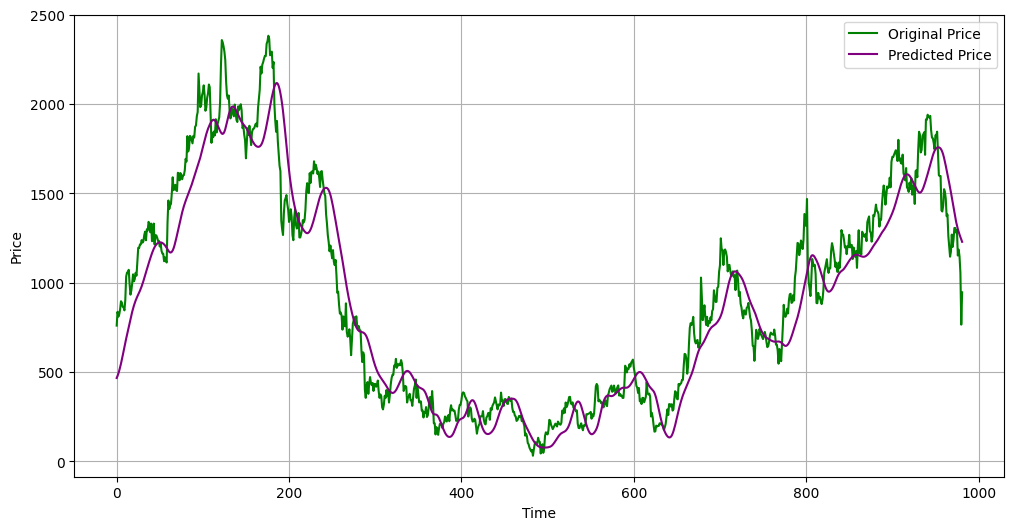

In [ ]:
import matplotlib.pyplot as plt

#  y_test and y_pred are  data arrays
plt.figure(figsize=(12, 6))

# Custom colors: Green for Original Price and Purple for Predicted Price
plt.plot(y_test, 'g', label="Original Price")  # Green
plt.plot(y_pred, '#800080', label="Predicted Price")  # Purple using hex code

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation

Calculation of mean absolute error and R2 Score

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))


Mean absolute error on test set: 15.18%


In [ ]:
from sklearn.metrics import r2_score
actual = y_test
predicted = y_pred
r2 = r2_score(actual, predicted)
print("R2 score:", r2)

R2 score: 0.9109624321583474


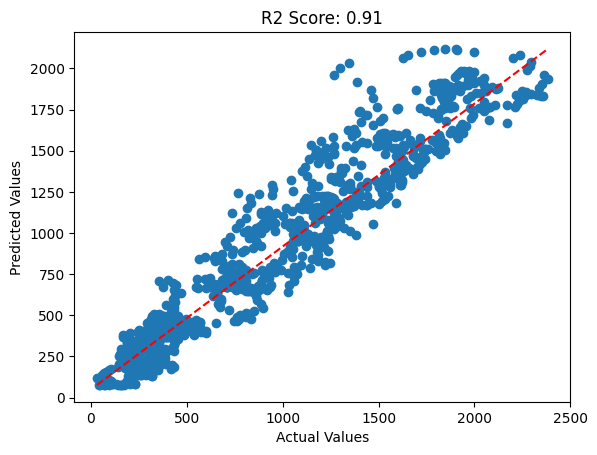

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()